In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Load threat_users to get user_ids
threat_path = r"C:\Users\sagni\Downloads\Insider Threat Detection\threat_users.csv"
threat_df = pd.read_csv(threat_path)

# Parameters
activity_types = ['login', 'file_access', 'email_send', 'usb_connect']
resources = ['Server1', 'Server2', 'FinanceDB', 'HR_Files', 'R&D_Repo', 'SharedDrive']
devices = ['Laptop-01', 'Desktop-04', 'Mobile-02', 'Tablet-03', 'Workstation-05']
locations = ['Kolkata', 'Bangalore', 'Delhi', 'Hyderabad', 'Chennai']
num_logs_per_user = 50  # you can increase if needed

# Create activity log
activity_logs = []
for user in threat_df['user_id'].unique():
    for _ in range(num_logs_per_user):
        log = {
            'user_id': user,
            'timestamp': datetime.now() - timedelta(days=random.randint(0, 30), hours=random.randint(0, 23), minutes=random.randint(0, 59)),
            'activity_type': random.choice(activity_types),
            'resource': random.choice(resources),
            'device': random.choice(devices),
            'location': random.choice(locations)
        }
        activity_logs.append(log)

# Convert to DataFrame
activity_df = pd.DataFrame(activity_logs)

# Save to CSV
activity_log_path = r"C:\Users\sagni\Downloads\Insider Threat Detection\activity_log.csv"
activity_df.to_csv(activity_log_path, index=False)
print(f"✅ Activity log created and saved to: {activity_log_path}")


✅ Activity log created and saved to: C:\Users\sagni\Downloads\Insider Threat Detection\activity_log.csv



🔎 Activity Count per High-Risk User:
    user_id      predicted_label  activity_count
0  user_10    Malicious Insider              50
1  user_23  Compromised Account              50
2  user_30    Malicious Insider              50
3  user_31  Compromised Account              50
4  user_33  Compromised Account              50
5  user_44    Malicious Insider              50
6  user_46    Malicious Insider              50


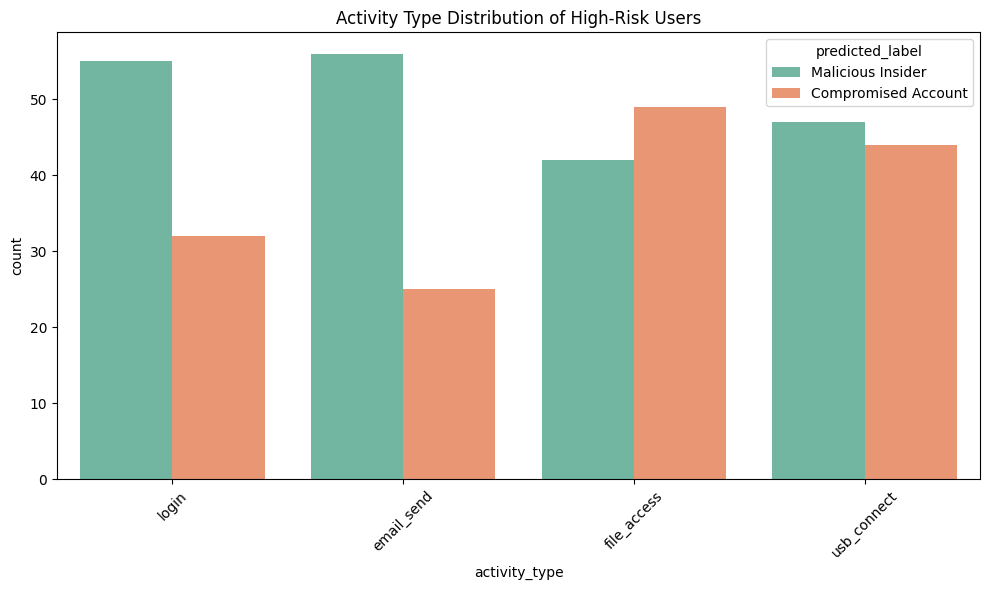

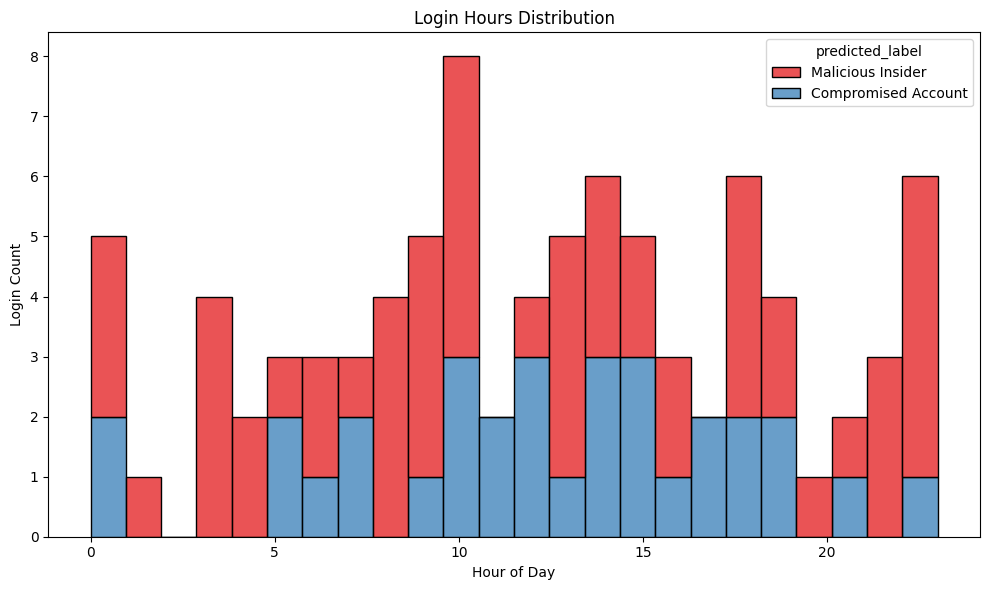

C:\Users\sagni\AppData\Local\Temp\ipykernel_15040\3059589441.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, y='resource', order=merged_df['resource'].value_counts().head(10).index, palette='coolwarm')


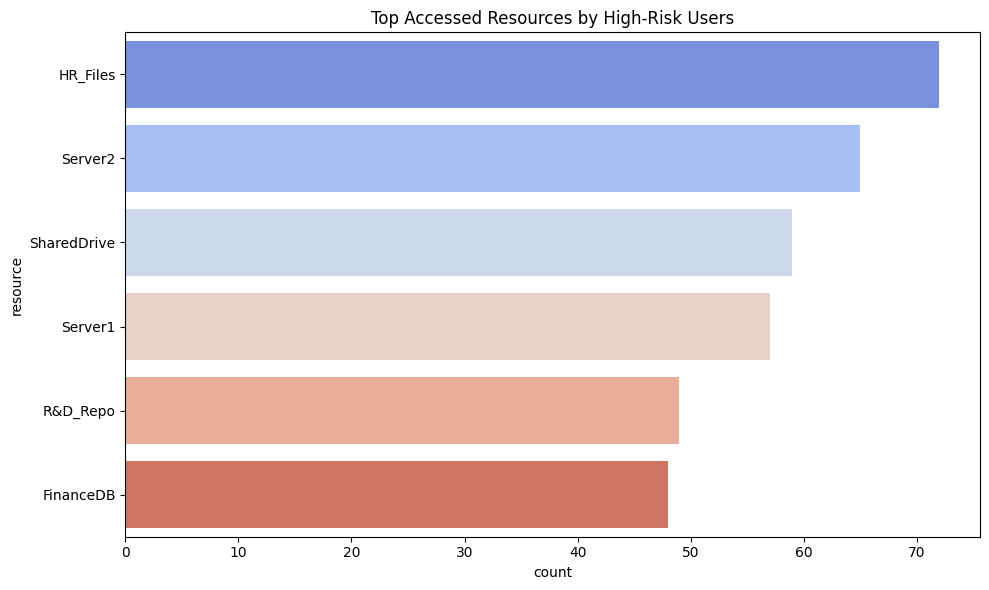

✅ Detailed merged activity logs saved to: C:\Users\sagni\Downloads\Insider Threat Detection\detailed_high_risk_logs.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load high-risk users
high_risk_path = r"C:\Users\sagni\Downloads\Insider Threat Detection\high_risk_users.csv"
high_risk_users = pd.read_csv(high_risk_path)

# Load activity log
activity_log_path = r"C:\Users\sagni\Downloads\Insider Threat Detection\activity_log.csv"  # <-- change this if needed
activity_df = pd.read_csv(activity_log_path)

# Merge logs with high-risk users
merged_df = activity_df.merge(high_risk_users, on='user_id', how='inner')

# Convert timestamp to datetime
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Add additional time-based features
merged_df['hour'] = merged_df['timestamp'].dt.hour
merged_df['dayofweek'] = merged_df['timestamp'].dt.day_name()

# Show activity count per user
user_activity_counts = merged_df.groupby(['user_id', 'predicted_label'])['activity_type'].count().reset_index(name='activity_count')
print("\n🔎 Activity Count per High-Risk User:\n", user_activity_counts)

# Plot 1: Activity type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='activity_type', hue='predicted_label', palette='Set2')
plt.title("Activity Type Distribution of High-Risk Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Login hours distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df[merged_df['activity_type'] == 'login'], x='hour', hue='predicted_label', multiple='stack', palette='Set1', bins=24)
plt.title("Login Hours Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Login Count")
plt.tight_layout()
plt.show()

# Plot 3: Accessed resources
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, y='resource', order=merged_df['resource'].value_counts().head(10).index, palette='coolwarm')
plt.title("Top Accessed Resources by High-Risk Users")
plt.tight_layout()
plt.show()

# Save merged detailed activity for further inspection
merged_output_path = r"C:\Users\sagni\Downloads\Insider Threat Detection\detailed_high_risk_logs.csv"
merged_df.to_csv(merged_output_path, index=False)
print(f"✅ Detailed merged activity logs saved to: {merged_output_path}")
